In [11]:
import gym
import time 

# 小车立柱

In [12]:
# env=gym.make('CartPole-v0')
env=gym.make('CartPole-v0')
for i_episode in range(20):
    observation=env.reset()
    for t in range(100):
        env.render()
        time.sleep(0.001)
#         print(observation)
        action=env.action_space.sample()
        observation,reward,done,info=env.step(action)
        if done:
            print('Episode finished after {} timesteps'.format(t+1))
            break
env.close()

Episode finished after 44 timesteps
Episode finished after 25 timesteps
Episode finished after 35 timesteps
Episode finished after 9 timesteps
Episode finished after 14 timesteps
Episode finished after 14 timesteps
Episode finished after 11 timesteps
Episode finished after 9 timesteps
Episode finished after 14 timesteps
Episode finished after 14 timesteps
Episode finished after 11 timesteps
Episode finished after 18 timesteps
Episode finished after 11 timesteps
Episode finished after 36 timesteps
Episode finished after 27 timesteps
Episode finished after 12 timesteps
Episode finished after 25 timesteps
Episode finished after 21 timesteps
Episode finished after 16 timesteps
Episode finished after 12 timesteps


In [3]:

# Number of steps you run the agent for 
num_steps = 1500
env=gym.make('CartPole-v0')
obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, info = env.step(action)
    
    # Render the env
    env.render()

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the env
env.close()

# 小车上坡

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)
The initial observation is [-0.55574334  0.        ]
The new observation is [-5.5550259e-01  2.4071058e-04]


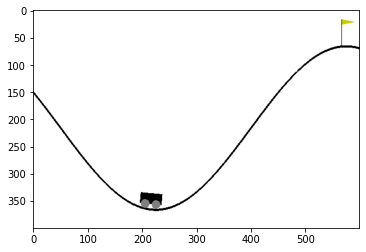

In [19]:
env = gym.make('MountainCar-v0')
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))
import matplotlib.pyplot as plt 

# reset the environment and see the initial observation
obs = env.reset()
print("The initial observation is {}".format(obs))

# Sample a random action from the entire action space
random_action = env.action_space.sample()

# # Take the action and get the new observation space
new_obs, reward, done, info = env.step(random_action)
print("The new observation is {}".format(new_obs))
env_screen = env.render(mode = 'rgb_array')
env.close()
plt.imshow(env_screen)

In [4]:
import time 

# Number of steps you run the agent for 
num_steps = 1500

obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, info = env.step(action)
    
    # Render the env
    env.render()

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the env
env.close()

# 出租车停车

In [15]:
import numpy as np
import gym
import random

# create Taxi environment
env = gym.make('Taxi-v3')
state = env.reset()
num_steps = 99
for s in range(num_steps+1):
    print(f"step: {s} out of {num_steps}")

    # sample a random action from the list of available actions
    action = env.action_space.sample()

    # perform this action on the environment
    env.step(action)

    # print the new state
    env.render(mode='human')
    time.sleep(0.001)
# end this instance of the taxi environment
env.close()

step: 0 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
step: 1 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
step: 2 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
step: 3 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
step: 4 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
step: 5 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
step: 6 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
step: 7 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
step: 8 out of 99
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (

In [18]:
import numpy as np
import gym
import random

def main():

    # create Taxi environment
    env = gym.make('Taxi-v3')

    # initialize q-table
    state_size = env.observation_space.n
    action_size = env.action_space.n
    qtable = np.zeros((state_size, action_size))

    # hyperparameters
    learning_rate = 0.9
    discount_rate = 0.8
    epsilon = 1.0
    decay_rate= 0.005

    # training variables
    num_episodes = 1000
    max_steps = 99 # per episode

    # training
    for episode in range(num_episodes):

        # reset the environment
        state = env.reset()
        done = False

        for s in range(max_steps):

            # exploration-exploitation tradeoff
            if random.uniform(0,1) < epsilon:
                # explore
                action = env.action_space.sample()
            else:
                # exploit
                action = np.argmax(qtable[state,:])

            # take action and observe reward
            new_state, reward, done, info = env.step(action)

            # Q-learning algorithm
            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])

            # Update to our new state
            state = new_state

            # if done, finish episode
            if done == True:
                break

        # Decrease epsilon
        epsilon = np.exp(-decay_rate*episode)

    print(f"Training completed over {num_episodes} episodes")
    input("Press Enter to watch trained agent...")

    # watch trained agent
    state = env.reset()
    done = False
    rewards = 0

    for s in range(max_steps):

        print(f"TRAINED AGENT")
        print("Step {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        rewards += reward
        env.render()
        print(f"score: {rewards}")
        state = new_state

        if done == True:
            break

    env.close()

if __name__ == "__main__":
    main()

Training completed over 1000 episodes
Press Enter to watch trained agent...
TRAINED AGENT
Step 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
score: -1
TRAINED AGENT
Step 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
score: -2
TRAINED AGENT
Step 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
score: -3
TRAINED AGENT
Step 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
score: -4
TRAINED AGENT
Step 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
score: -5
TRAINED AGENT
Step 6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
score: -6
TRAINED AGENT
Step 7
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
score: -7
TRAINED AGENT
Step 8
+---------+
|R: | : :G|
| : | : 